# Automatic Speech Processing Final Year Project

---



In [1]:
pip install openai-whisper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 798.6/798.6 kB 13.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using c

In [2]:
pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 21.6 MB/s eta 0:00:00


In [4]:
pip install pydub


In [3]:
pip install textdistance


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [7]:
import os
import whisper
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pydub import AudioSegment
import textdistance
import jiwer
from collections import Counter

## Load Songs

In [8]:
songs_dir = "/content/drive/MyDrive/FinalProject/data/songs/"
transcripts_dir = "/content/drive/MyDrive/FinalProject/data/transcripts/"
output_dir = "/content/drive/MyDrive/FinalProject/data/output_transcripts/"
os.makedirs(output_dir, exist_ok=True)
#songs.sort()
#transcripts.sort()

## Load the Whisper Model:

In [9]:
model = whisper.load_model("medium")


100%|█████████████████████████████████████| 1.42G/1.42G [00:15<00:00, 98.6MiB/s]


## Define Functions

In [10]:
def convert_mp3_to_wav(mp3_file, wav_file):
    audio = AudioSegment.from_mp3(mp3_file)
    audio.export(wav_file, format="wav")

def transcribe_audio(wav_file):
    result = model.transcribe(wav_file)
    return result['text']

## Transcription and Comparison:

In [11]:

transformation = jiwer.Compose([
    jiwer.ToLowerCase(),
    jiwer.RemoveMultipleSpaces(),
    jiwer.RemovePunctuation(),
    jiwer.Strip()
])

In [12]:
results = []
accuracies = []
mismatched_words = []

for song_file in sorted(os.listdir(songs_dir)):
    if song_file.endswith(".mp3"):
        song_path = os.path.join(songs_dir, song_file)
        transcript_path = os.path.join(transcripts_dir, song_file.replace(".mp3", ".txt"))
        wav_path = song_path.replace(".mp3", ".wav")

        convert_mp3_to_wav(song_path, wav_path)
        transcription = transcribe_audio(wav_path)

        with open(transcript_path, 'r') as file:
            human_transcript = file.read().strip()

        ground_truth = transformation(human_transcript)
        hypothesis = transformation(transcription)

        measures = jiwer.compute_measures(ground_truth, hypothesis)
        accuracy = (1 - measures['wer']) * 100
        results.append(accuracy)
        accuracies.append((song_file, accuracy))

        ground_words = ground_truth.split()
        hypo_words = hypothesis.split()
        mismatches = [(truth, hypo) for truth, hypo in zip(ground_words, hypo_words) if truth != hypo]
        mismatched_words.extend(mismatches)


## Comparison Results

In [13]:
# Overall Accuracy
overall_accuracy = sum(results) / len(results)
print(f"Overall Accuracy: {overall_accuracy:.2f}%")

Overall Accuracy: 51.51%


In [14]:
# Print the accuracies for each song
for song_name, accuracy in accuracies:
    print(f"Accuracy for {song_name}: {accuracy:.2f}%")

Accuracy for 01_Roddy_Ricch_The_Box.mp3: 59.01%
Accuracy for 02_Future_Life_Is_Good.mp3: 52.37%
Accuracy for 03_Post_Malone_Circles.mp3: 56.64%
Accuracy for 04_Maroon_5_Memories.mp3: 60.05%
Accuracy for 05_Lewis_Capaldi_Someone_You_Loved.mp3: 38.10%
Accuracy for 06_Tones_and_I_Dance_Monkey.mp3: 46.45%
Accuracy for 07_Arizona_Zervas_ROXANNE.mp3: 46.32%
Accuracy for 08_Lizzo_Truth_Hurts.mp3: 54.73%
Accuracy for 09_Dua_Lipa_Don_t_Start_Now.mp3: 53.15%
Accuracy for 10_Billie_Eilish_everything_i_wanted.mp3: 55.38%
Accuracy for 11_Selena_Gomez_Lose_You_To_Love_Me.mp3: 51.71%
Accuracy for 12_Ed_Sheeran_I_Don_t_Care.mp3: 62.45%
Accuracy for 13_DaBaby_BOP.mp3: 64.79%
Accuracy for 14_Justin_Bieber_Yummy.mp3: 38.48%
Accuracy for 15_The_Weeknd_Blinding_Lights.mp3: 61.88%
Accuracy for 16_Lizzo_Good_as_Hell.mp3: 45.95%
Accuracy for 17_The_Weeknd_Heartless.mp3: 54.84%
Accuracy for 18_Maren_Morris_The_Bones.mp3: 59.31%
Accuracy for 19_Blackbear_hot_girl_bummer.mp3: 57.04%
Accuracy for 20_Eminem_Godzil

## Result Visulization

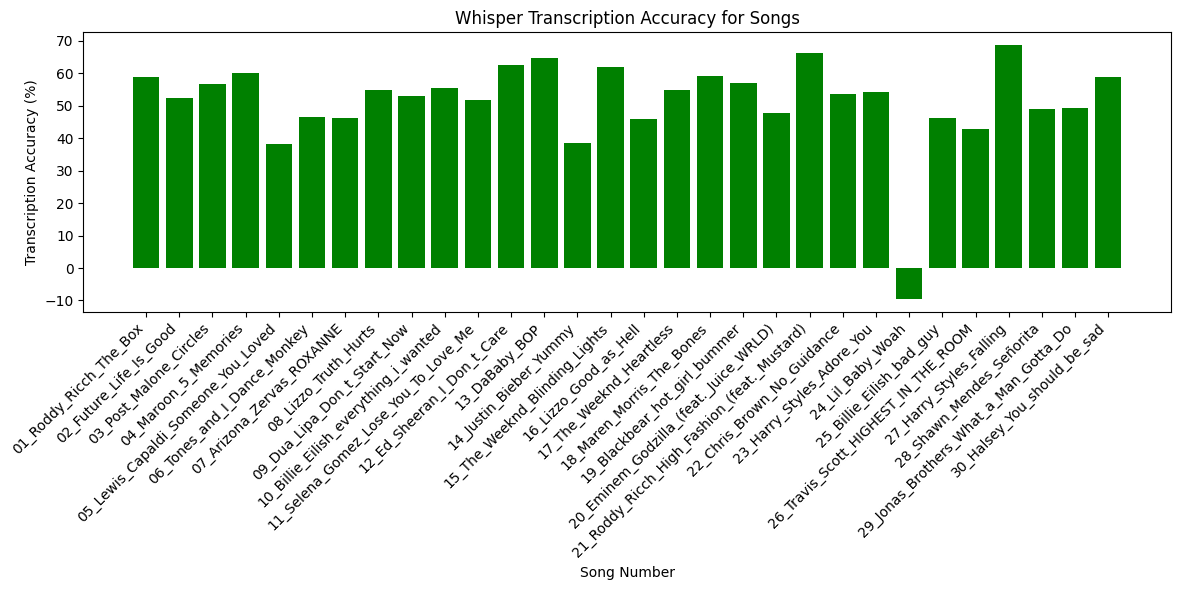

In [15]:
# Visualization of Individual Song Accuracies
plt.figure(figsize=(12, 6))
plt.bar(range(len(results)), results, color='green')
plt.xlabel('Song Number')
plt.ylabel('Transcription Accuracy (%)')
plt.title('Whisper Transcription Accuracy for Songs')
plt.xticks(range(len(results)), [a[0].replace('.mp3', '') for a in accuracies], rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [16]:
# Print mismatched words
print("Mismatched Words:")
mismatch_counter = Counter(mismatched_words)
for (truth, hypo), count in mismatch_counter.items():
    print(f"Expected: '{truth}', Transcribed: '{hypo}' - Occurred {count} times")

Streaming output truncated to the last 5000 lines.
Expected: 'finding', Transcribed: 'diggity' - Occurred 1 times
Expected: 'some', Transcribed: 'tryna' - Occurred 1 times
Expected: 'money', Transcribed: 'find' - Occurred 1 times
Expected: 'lets', Transcribed: 'out' - Occurred 2 times
Expected: 'go', Transcribed: 'why' - Occurred 1 times
Expected: 'as', Transcribed: 'baby' - Occurred 2 times
Expected: 'soon', Transcribed: 'aint' - Occurred 1 times
Expected: 'as', Transcribed: 'all' - Occurred 1 times
Expected: 'found', Transcribed: 'the' - Occurred 1 times
Expected: 'it', Transcribed: 'mentions' - Occurred 1 times
Expected: 'flipped', Transcribed: 'she' - Occurred 1 times
Expected: 'that', Transcribed: 'aint' - Occurred 1 times
Expected: 'flip', Transcribed: 'gettin' - Occurred 1 times
Expected: 'im', Transcribed: 'no' - Occurred 2 times
Expected: 'a', Transcribed: 'dm' - Occurred 1 times
Expected: 'little', Transcribed: 'from' - Occurred 1 times
Expected: 'bit', Transcribed: 'me' - Oc

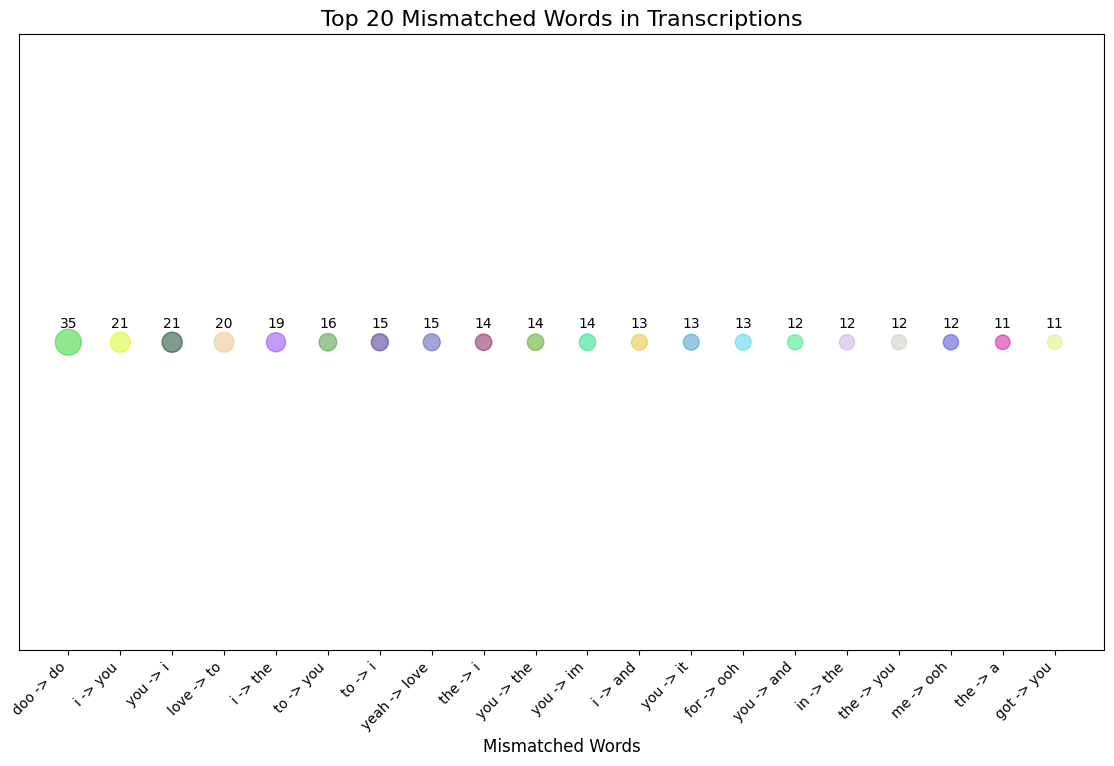

In [17]:
import matplotlib.pyplot as plt
import numpy as np
top_mismatches = mismatch_counter.most_common(20)

words = [f"{truth} -> {hypo}" for truth, hypo in [item[0] for item in top_mismatches]]
counts = [item[1] for item in top_mismatches]
sizes = [count * 10 for count in counts]

fig, ax = plt.subplots(figsize=(14, 8))
bubble = ax.scatter(words, np.zeros_like(words), s=sizes, alpha=0.5, color=np.random.rand(len(words), 3))

ax.set_title('Top 20 Mismatched Words in Transcriptions', fontsize=16)
ax.set_xlabel('Mismatched Words', fontsize=12)
plt.xticks(rotation=45, ha='right')

ax.yaxis.set_visible(False)

for i, txt in enumerate(counts):
    ax.annotate(txt, (words[i], 0), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()
